In [1]:
# 코드 3-1 라이브러리 호출 및 데이터 준비
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

names = ["sepal-length", "sepal-width", "petal-length", "petal-width", "Class"]
dataset = pd.read_csv("../chap3/data/iris.data", names=names)

In [2]:
dataset

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# 코드 3-2 훈련과 검증 데이터셋 분리
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [4]:
from sklearn.preprocessing import (
    StandardScaler,
)  # StandardScaler를 sklearn.preprocessing에서 가져옵니다.

s = StandardScaler()  # StandardScaler 객체를 생성합니다.

X_train = s.fit_transform(
    X_train
)  # X_train 데이터를 표준화합니다 (평균을 0, 분산을 1로 만듭니다).
X_test = s.fit_transform(
    X_test
)  # X_test 데이터를 표준화합니다 (평균을 0, 분산을 1로 만듭니다).

In [5]:
# 코드 3-3 모델 생성 및 훈련
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [6]:
# 코드 3-4 모델 정확도
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)
print("정확도: {}".format(accuracy_score(y_test, y_pred)))

정확도: 0.8666666666666667


In [7]:
# 코드 3-5 최적의 K 찾기
# k의 최대값을 설정합니다.
k = 10

# 정확도를 저장할 배열을 0으로 초기화합니다.
acc_array = np.zeros(k)

# k 값을 1부터 k까지 반복합니다.
for k in np.arange(1, k + 1, 1):
    # k-최근접 이웃 분류기를 생성하고 훈련 데이터에 맞춥니다.
    classifier = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

    # 테스트 데이터를 사용하여 예측을 수행합니다.
    y_pred = classifier.predict(X_test)

    # 예측된 값과 실제 값을 비교하여 정확도를 계산합니다.
    acc = metrics.accuracy_score(y_test, y_pred)

    # 계산된 정확도를 배열에 저장합니다.
    acc_array[k - 1] = acc

# 배열에서 최대 정확도를 찾습니다.
max_acc = np.amax(acc_array)

# 정확도 배열을 리스트로 변환합니다.
acc_list = list(acc_array)

# 최대 정확도의 인덱스를 찾습니다.
k = acc_list.index(max_acc)

# 최적의 k 값과 그 때의 정확도를 출력합니다.
print("정확도 ", max_acc, "으로 최적의 k는", k + 1, "입니다.")

정확도  0.9 으로 최적의 k는 1 입니다.


In [ ]:
#3.1.2 서포트 벡터 머신(SVM)

In [8]:
# 코드 3-6 라이브러리 호출
from sklearn import svm, metrics, datasets, model_selection
import tensorflow as tf
import os

os.environ["TF_CPP_MI_LOG_LEVEL"] = "3"

2024-12-03 00:56:07.314968: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-03 00:56:07.318886: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-03 00:56:07.326151: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733154967.336776   83644 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733154967.339799   83644 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-03 00:56:07.352682: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [9]:
# 코드 3-7 iris 데이터를 준비하고 훈련과 검증 데이터셋으로 분리
iris = datasets.load_iris()
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    iris.data, iris.target, test_size=0.2
)

In [10]:
# 코드 3-8 SVM 모델에 대한 정확도
svm_model = svm.SVC(kernel="linear", C=1.0, gamma=0.5)
svm_model.fit(x_train, y_train)
predictions = svm_model.predict(x_test)
score = metrics.accuracy_score(y_test, predictions)
print("정확도: {0:f}".format(score))

정확도: 0.966667


In [132]:
#3.1.3 의사결정 트리

In [11]:
# 코드 3-9 라이브러리 호출 및 데이터 준비
import pandas as pd

df = pd.read_csv("../chap3/data/titanic/train.csv", index_col="PassengerId")
print(df.head())

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S

In [12]:
# 코드 3-10 데이터 전처리
df = df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Survived"]]
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df = df.dropna()
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [13]:
# 코드 3-11 훈련과 검증 데이터셋으로 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [14]:
# 코드 3-12 결정 트리 모델 생성
from sklearn import tree

model = tree.DecisionTreeClassifier()

In [15]:
# 코드 3-13 모델 훈련
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
# 코드 3-14 모델 예측
y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score

print("정확도:", accuracy_score(y_test, y_predict))

정확도: 0.8268156424581006


In [17]:
# 코드 3-15 혼동 행렬을 이용한 성능 측정
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=["Predicted Not Survival", "Predicted Survival"],
    index=["True Not Survival", "True Survival"],
)

,Predicted Not Survival,Predicted Survival
True Not Survival,98,14
True Survival,17,50


In [144]:
#3.1.4 로지스틱 회귀

In [18]:
# 코드 3-16 라이브러리 호출 및 데이터 준비
# Jupyter Notebook에서 그래프를 인라인으로 표시하기 위해 설정합니다.
%matplotlib inline

# 사이킷런에서 손글씨 숫자 데이터셋을 로드하는 함수를 가져옵니다.
from sklearn.datasets import load_digits

# 손글씨 숫자 데이터셋을 로드합니다.
digits = load_digits()

# 데이터셋의 이미지 데이터의 형태를 출력합니다.
print("Image Data Shape", digits.data.shape)

# 데이터셋의 레이블 데이터의 형태를 출력합니다.
print("Label, Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label, Data Shape (1797,)


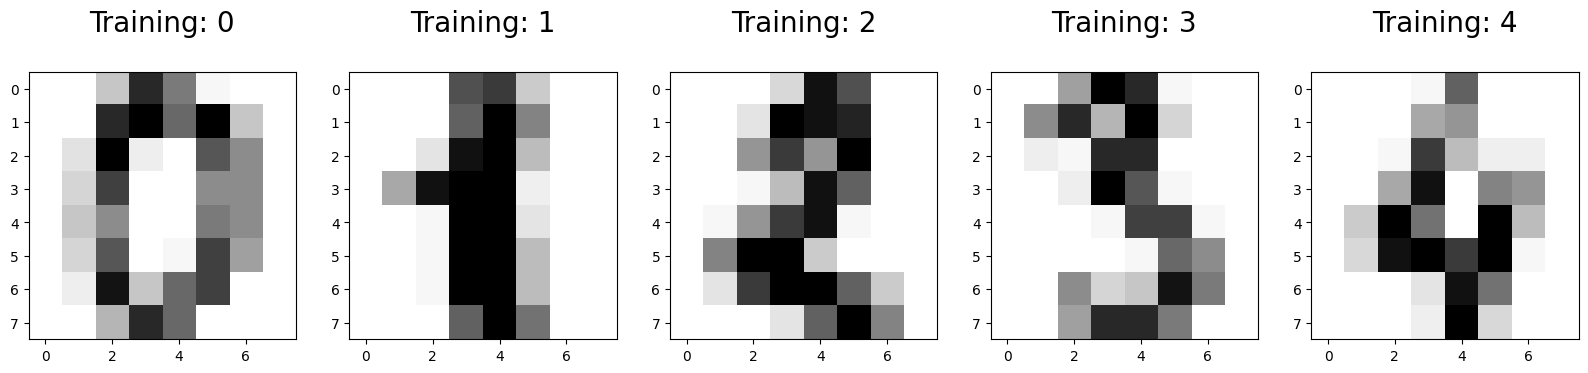

In [19]:
# 코드 3-17 digits 데이터셋의 시각화
import numpy as np
import matplotlib.pyplot as plt

# 새로운 그림을 생성하고 크기를 설정합니다.
plt.figure(figsize=(20, 4))

# digits 데이터셋의 첫 5개의 이미지와 레이블을 반복합니다.
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    # 1행 5열의 서브플롯 중 index + 1 번째 위치에 서브플롯을 생성합니다.
    plt.subplot(1, 5, index + 1)

    # 이미지를 8x8 형태로 재구성하여 회색조로 표시합니다.
    plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.Greys)

    # 서브플롯의 제목을 설정합니다. 레이블 값을 포함합니다.
    plt.title("Training: %i\n" % label, fontsize=20)

In [20]:
# 코드 3-18 훈련과 검증 데이터셋 분리 및 로지스틱 회귀 모델 생성
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.25, random_state=0
)

from sklearn.linear_model import LogisticRegression

logisticRegression = LogisticRegression()
logisticRegression.fit(x_train, y_train)

/home/halozhan/Study/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
# 코드 3-19 일부 데이터를 사용한 모델 예측
# logisticRegression 객체를 사용하여 첫 번째 테스트 샘플에 대한 예측을 수행합니다.
# x_test[0]은 첫 번째 샘플을 나타내며, reshape(1, -1)은 이를 2차원 배열로 변환합니다.
logisticRegression.predict(x_test[0].reshape(1, -1))

# logisticRegression 객체를 사용하여 첫 번째 10개의 테스트 샘플에 대한 예측을 수행합니다.
# x_test[0:10]은 첫 번째 10개의 샘플을 나타냅니다.
logisticRegression.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [22]:
# 코드 3-20 전체 데이터를 사용한 모델 예측
predictions = logisticRegression.predict(x_test)
score = logisticRegression.score(x_test, y_test)
print(score)

0.9511111111111111


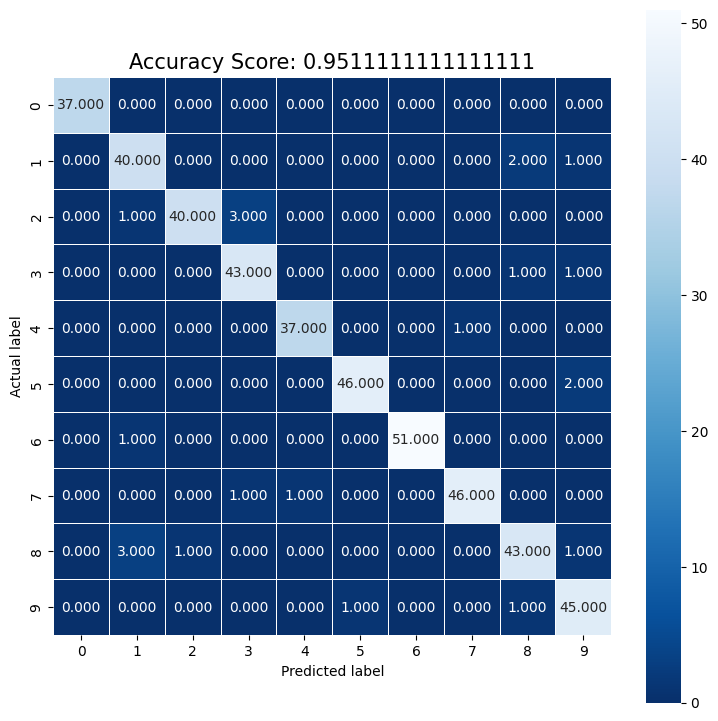

In [23]:
# 코드 3-21 혼동 행렬 시각화
import numpy as np
import seaborn as sns
from sklearn import metrics

# 혼동 행렬을 계산합니다.
cm = metrics.confusion_matrix(y_test, predictions)

# 새로운 그림을 생성하고 크기를 설정합니다.
plt.figure(figsize=(9, 9))

# 혼동 행렬을 히트맵으로 시각화합니다.
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=0.5, square=True, cmap="Blues_r")

# y축 레이블을 설정합니다.
plt.ylabel("Actual label")

# x축 레이블을 설정합니다.
plt.xlabel("Predicted label")

# 정확도 점수를 제목으로 설정합니다.
all_sample_title = f"Accuracy Score: {score}"
plt.title(all_sample_title, size=15)

# 히트맵을 화면에 표시합니다.
plt.show()

In [1]:
#3.1.4 선형 회귀

In [24]:
# 코드 3-22 라이브러리 호출
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [25]:
# 코드 3-23 weather.csv 파일 불러오기
dataset = pd.read_csv("../chap3/data/weather.csv")

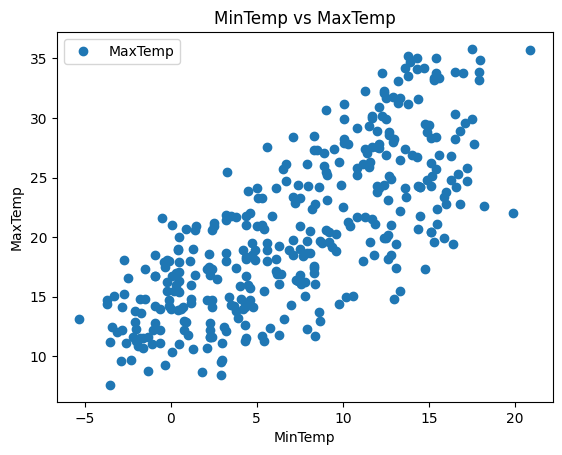

In [26]:
# 코드 3-24 데이터 간 관계를 시각화로 표현
dataset.plot(x="MinTemp", y="MaxTemp", style="o")
plt.title("MinTemp vs MaxTemp")
plt.xlabel("MinTemp")
plt.ylabel("MaxTemp")
plt.show()

In [27]:
# 코드 3-25 데이터를 독립 변수와 종속 변수로 분리하고 선형 회귀 모델 생성
X = dataset["MinTemp"].values.reshape(-1, 1)
y = dataset["MaxTemp"].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [28]:
# 코드 3-26 회귀 모델에 대한 예측
y_pred = regressor.predict(X_test)
df = pd.DataFrame({"Actual": y_test.flatten(), "Predicted": y_pred.flatten()})
df

,Actual,Predicted
0,25.2,23.413030
1,11.5,13.086857
2,21.1,27.264856
3,22.2,25.461874
4,20.4,26.937041
...,...,...
69,18.9,20.216833
70,22.8,27.674625
71,16.1,21.446140
72,25.1,24.970151


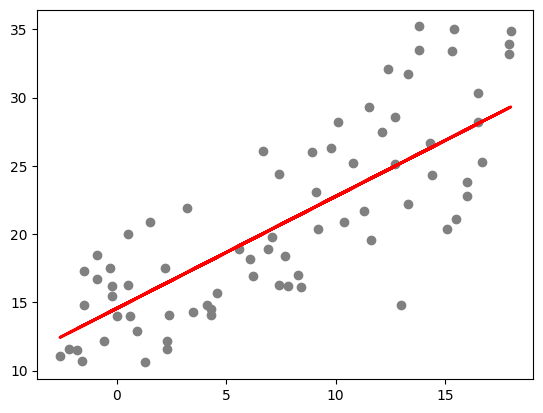

In [29]:
# 코드 3-27 검증 데이터셋을 사용한 회귀선 표현
plt.scatter(X_test, y_test, color="gray")
plt.plot(X_test, y_pred, color="red", linewidth=2)
plt.show()

In [30]:
# 코드 3-28 선형 회귀 모델 평가
print("평균제곱법:", metrics.mean_squared_error(y_test, y_pred))
print("루트 평균제곱법:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

평균제곱법: 17.011877668640622
루트 평균제곱법: 4.124545753006096


In [9]:
#3.2.3 PCA

In [31]:
# 코드 3-34 라이브러리 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [32]:
# 코드 3-35 데이터 불러오기
X = pd.read_csv("../chap3/data/credit card.csv")
X = X.drop("CUST_ID", axis=1)
X.fillna(method="ffill", inplace=True)
print(X.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

/tmp/ipykernel_83644/2986878059.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method="ffill", inplace=True)


In [33]:
# 코드 3-36 데이터 전처리 및 데이터를 2차원으로 차원 축소
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_normalizezd = normalize(X_scaled)
X_normalizezd = pd.DataFrame(X_normalizezd)
pca = PCA(n_components=2)
X_principal = pca.fit_transform(X_normalizezd)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ["P1", "P2"]
print(X_principal.head())

         P1        P2
0 -0.489949 -0.679976
1 -0.519099  0.544827
2  0.330633  0.268879
3 -0.481656 -0.097611
4 -0.563512 -0.482506


In [34]:
# 코드 3-37 DBSCAN 모델 생성 및 결과의 시각화
# DBSCAN 클러스터링을 수행합니다.
# eps는 두 샘플 간의 최대 거리, min_samples는 코어 포인트로 간주되기 위한 최소 샘플 수를 나타냅니다.
db_default = DBSCAN(eps=0.0375, min_samples=3).fit(X_principal)

# 클러스터 레이블을 가져옵니다.
# 각 샘플에 대해 클러스터 레이블을 나타내며, -1은 노이즈를 의미합니다.
labels = db_default.labels_

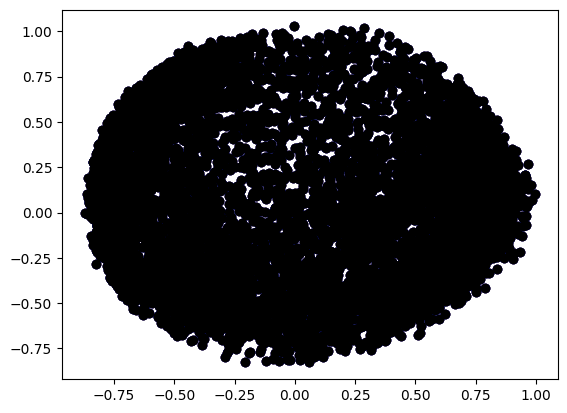

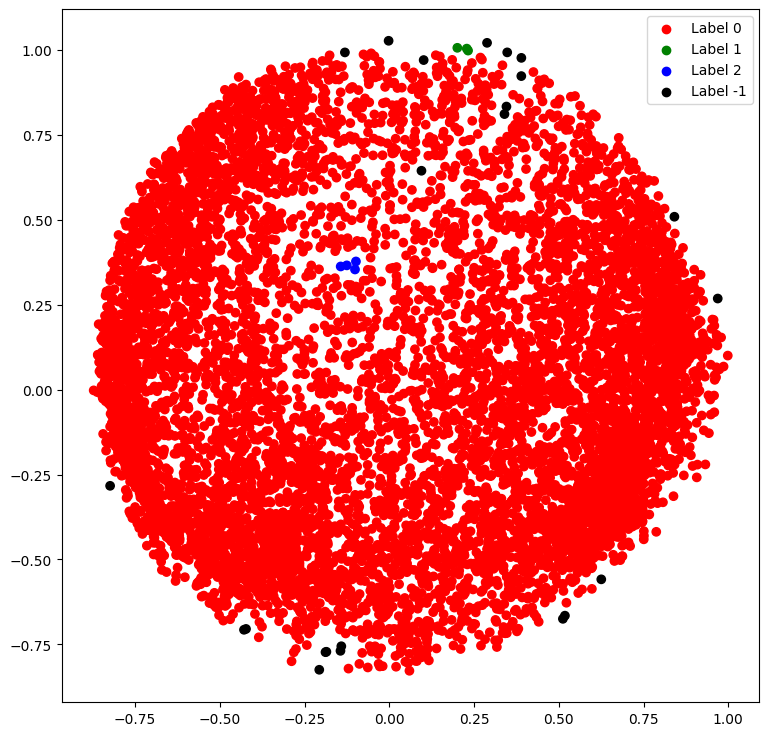

In [35]:
colours = {}
colours[0] = "r"
colours[1] = "g"
colours[2] = "b"
colours[-1] = "k"

cvec = [colours[label] for label in labels]

r = plt.scatter(X_principal["P1"], X_principal["P2"], color="r")
g = plt.scatter(X_principal["P1"], X_principal["P2"], color="g")
b = plt.scatter(X_principal["P1"], X_principal["P2"], color="b")
k = plt.scatter(X_principal["P1"], X_principal["P2"], color="k")

plt.figure(figsize=(9, 9))
plt.scatter(X_principal["P1"], X_principal["P2"], c=cvec)

plt.legend((r, g, b, k), ("Label 0", "Label 1", "Label 2", "Label -1"))
plt.show()

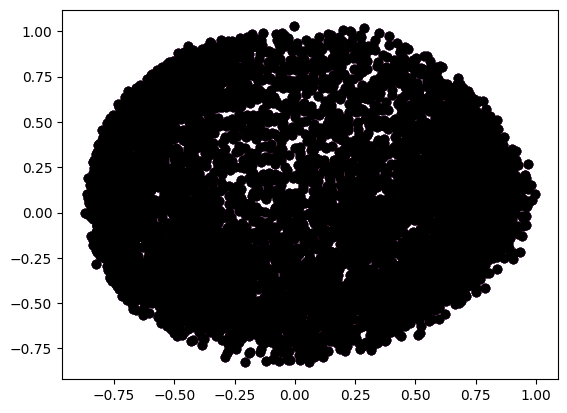

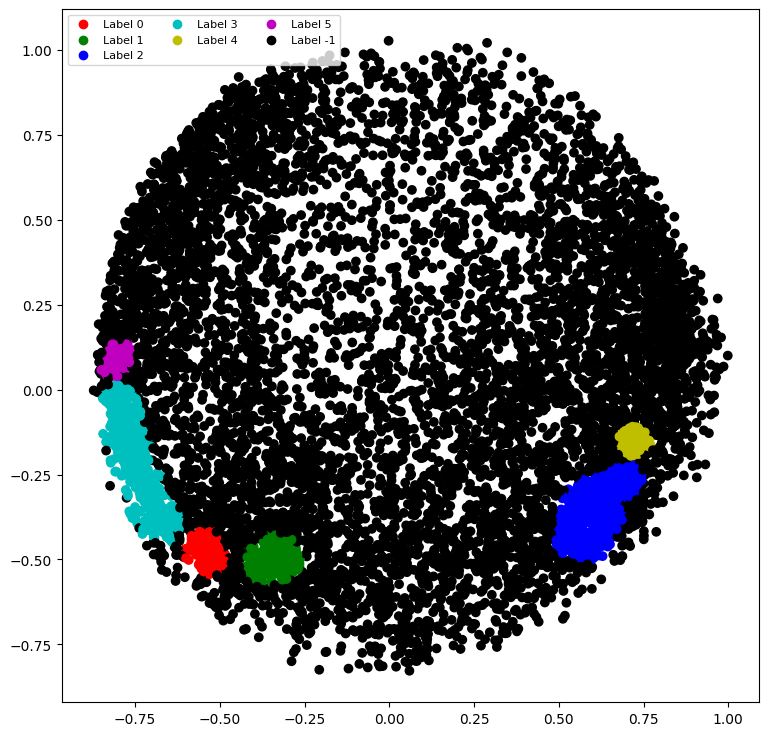

In [36]:
# 코드 3-38 모델 튜닝
# DBSCAN 클러스터링을 수행합니다.
# eps는 두 샘플 간의 최대 거리, min_samples는 코어 포인트로 간주되기 위한 최소 샘플 수를 나타냅니다.
db = DBSCAN(eps=0.0375, min_samples=50).fit(X_principal)

# 클러스터 레이블을 가져옵니다.
# 각 샘플에 대해 클러스터 레이블을 나타내며, -1은 노이즈를 의미합니다.
labels1 = db.labels_

# 클러스터 레이블에 따른 색상을 정의합니다.
colours1 = {}
colours1[0] = "r"  # 레이블 0에 대한 색상: 빨간색
colours1[1] = "g"  # 레이블 1에 대한 색상: 초록색
colours1[2] = "b"  # 레이블 2에 대한 색상: 파란색
colours1[3] = "c"  # 레이블 3에 대한 색상: 청록색
colours1[4] = "y"  # 레이블 4에 대한 색상: 노란색
colours1[5] = "m"  # 레이블 5에 대한 색상: 자주색
colours1[-1] = "k"  # 노이즈에 대한 색상: 검정색

# 각 샘플의 클러스터 레이블에 따라 색상을 할당합니다.
cvec = [colours1[label] for label in labels1]

# 각 클러스터 레이블에 대해 산점도를 생성합니다.
r = plt.scatter(X_principal["P1"], X_principal["P2"], marker="o", color=colours1[0])
g = plt.scatter(X_principal["P1"], X_principal["P2"], marker="o", color=colours1[1])
b = plt.scatter(X_principal["P1"], X_principal["P2"], marker="o", color=colours1[2])
c = plt.scatter(X_principal["P1"], X_principal["P2"], marker="o", color=colours1[3])
y = plt.scatter(X_principal["P1"], X_principal["P2"], marker="o", color=colours1[4])
m = plt.scatter(X_principal["P1"], X_principal["P2"], marker="o", color=colours1[5])
k = plt.scatter(X_principal["P1"], X_principal["P2"], marker="o", color=colours1[-1])

# 새로운 그림을 생성하고 크기를 설정합니다.
plt.figure(figsize=(9, 9))

# 클러스터 레이블에 따라 색상이 지정된 산점도를 생성합니다.
plt.scatter(X_principal["P1"], X_principal["P2"], c=cvec)

# 범례를 추가합니다.
plt.legend(
    (r, g, b, c, y, m, k),
    ("Label 0", "Label 1", "Label 2", "Label 3", "Label 4", "Label 5", "Label -1"),
    scatterpoints=1,
    loc="upper left",
    ncol=3,
    fontsize=8,
)

# 그래프를 화면에 표시합니다.
plt.show()

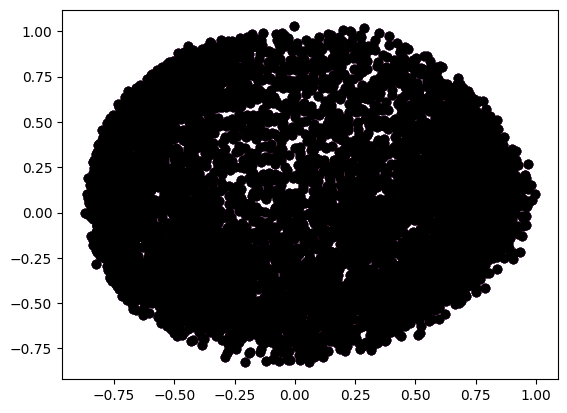

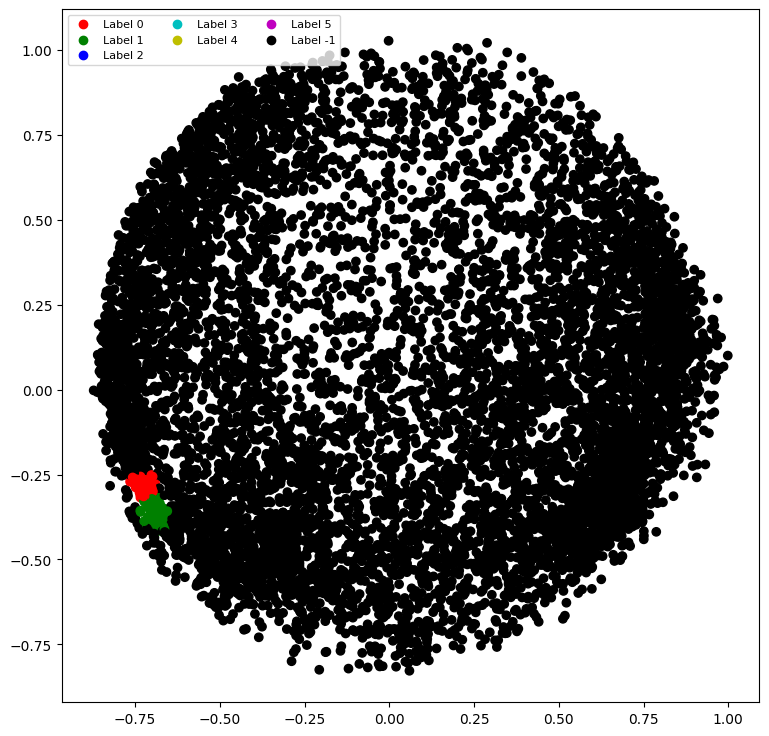

In [37]:
# 코드 3-39 min_samples를 50에서 100으로 변경
db = DBSCAN(eps=0.0375, min_samples=100).fit(X_principal)
labels1 = db.labels_

colours1 = {}
colours1[0] = "r"
colours1[1] = "g"
colours1[2] = "b"
colours1[3] = "c"
colours1[4] = "y"
colours1[5] = "m"
colours1[-1] = "k"

cvec = [colours1[label] for label in labels1]

r = plt.scatter(X_principal["P1"], X_principal["P2"], marker="o", color=colours1[0])
g = plt.scatter(X_principal["P1"], X_principal["P2"], marker="o", color=colours1[1])
b = plt.scatter(X_principal["P1"], X_principal["P2"], marker="o", color=colours1[2])
c = plt.scatter(X_principal["P1"], X_principal["P2"], marker="o", color=colours1[3])
y = plt.scatter(X_principal["P1"], X_principal["P2"], marker="o", color=colours1[4])
m = plt.scatter(X_principal["P1"], X_principal["P2"], marker="o", color=colours1[5])
k = plt.scatter(X_principal["P1"], X_principal["P2"], marker="o", color=colours1[-1])

plt.figure(figsize=(9, 9))
plt.scatter(X_principal["P1"], X_principal["P2"], c=cvec)
plt.legend(
    (r, g, b, c, y, m, k),
    ("Label 0", "Label 1", "Label 2", "Label 3", "Label 4", "Label 5", "Label -1"),
    scatterpoints=1,
    loc="upper left",
    ncol=3,
    fontsize=8,
)
plt.show()